In [1]:
#!pip install -U scikit-learn scipy matplotlib

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import os
import itertools
import glob
from utils import *


In [3]:
iou_treshold = 0.5
CONFIDENCE_THRESHOLD = 0.2
IMAGE_WIDTH = 2464
IMAGE_HEIGHT = 2056

SYNTETIC_DATA_DIRECTORY = '/cluster/home/solveijm/DNV_synthetic_data_w_pose'
CREATE_TESTSET = False

# Syntethic data folders to be tested on

We have trained on: 
- '2023-04-26_1656_dnv_scenario1_full_00_000_MorningClear' 
- '2023-04-26_1658_dnv_scenario1_full_00_000_MorningCloudy'
- Hurtigruta dataset

In [4]:
light_condition1 = ['2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear']
light_condition2 = ['2023-05-09_1257_dnv_scenario1_full_00_000_AfternoonClear']
light_condition3 = ['2023-05-09_1308_dnv_scenario1_full_00_000_EveningClear']
light_condition4 = ['2023-05-09_1324_dnv_scenario1_full_00_000_NightClear']

cloud_light1 = ['2023-05-09_1330_dnv_scenario1_full_00_000_NoonCloudy']
cloud_light2 = ['2023-05-09_1300_dnv_scenario1_full_00_000_AfternoonCloudy']
cloud_light3 = ['2023-05-09_1313_dnv_scenario1_full_00_000_EveningCloudy']
cloud_light4 = ['2023-05-09_1326_dnv_scenario1_full_00_000_NightCloudy']

rain_light1 = ['2023-05-09_1332_dnv_scenario1_full_00_000_NoonCloudy_Rain']
rain_light2 = ['2023-05-09_1311_dnv_scenario1_full_00_000_EveningCloudy_Rain']
rain_light3 = ['2023-05-09_1302_dnv_scenario1_full_00_000_AfternoonCloudy_Rain']

foggy = ['2023-05-09_1315_dnv_scenario1_full_00_000_FoggyClear']
foggy_cloudy = ['2023-05-09_1317_dnv_scenario1_full_00_000_FoggyCloudy']

stormy = ['2023-05-09_1339_dnv_scenario1_full_00_000_StormClouds']
stormy_rain = ['2023-05-09_1341_dnv_scenario1_full_00_000_StormyClouds_Rain']


all_conditions = [light_condition1, light_condition2, light_condition3, light_condition4, cloud_light1, cloud_light2, cloud_light3, cloud_light4, rain_light1, rain_light2, rain_light3, foggy, foggy_cloudy, stormy, stormy_rain]
all_conditions_names = ['light_condition1', 'light_condition2', 'light_condition3', 'light_condition4', 'cloud_light1', 'cloud_light2', 'cloud_light3', 'cloud_light4', 'rain_light1', 'rain_light2', 'rain_light3', 'foggy', 'foggy_cloudy', 'stormy', 'stormy_rain']


## Create test set for each folder

In [5]:
if CREATE_TESTSET:
    test_sets = {}

    for i, condition in enumerate(all_conditions):
        all_image_paths = []
        for folder in condition:
            path = os.path.join(SYNTETIC_DATA_DIRECTORY, folder)+'/images/'
            image_paths = glob.glob(f'{path}*.jpg')
            for image in image_paths:
                all_image_paths.append(os.path.join(path, image))
        test_file = os.path.join(SYNTETIC_DATA_DIRECTORY, f'test_{all_conditions_names[i]}.txt')
        test_sets[all_conditions_names[i]] = test_file
        with open(test_file, 'w+') as f:
            f.writelines('\n'.join(all_image_paths))
    print(test_sets)


# Test after training on hurtigruta

### Light condition 1

In [6]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_100e_1024imgsz_only_hurtigruta_correct/weights/best.pt source='/cluster/home/solveijm/DNV_synthetic_data_w_pose/2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear/test.txt' imgsz=1024 name=test_light_condition1_1024imgz_only_hurtigruta_correct save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[264  64]
 [560   0]]
Precision:
0.8048780487804879
Recall:
0.32038834951456313


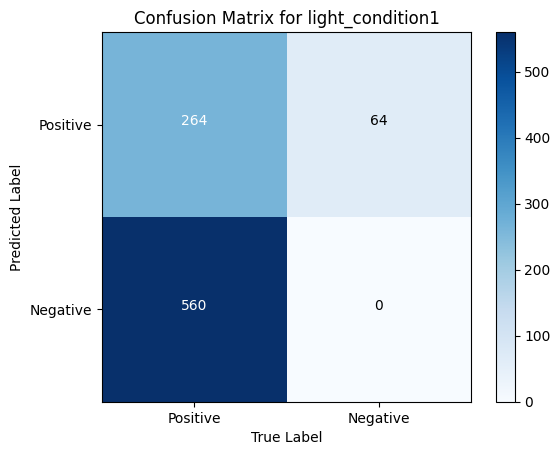

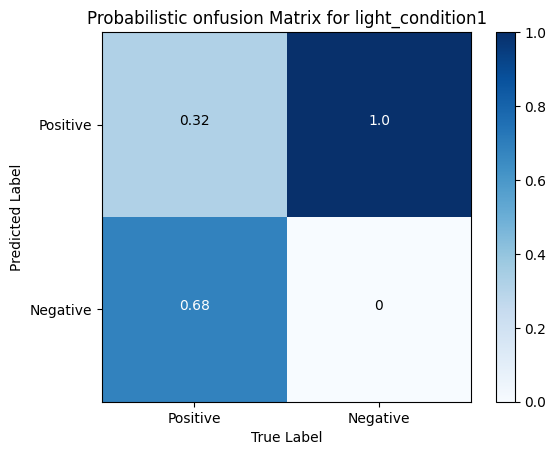



BOUNDING BOX ERRORS FOR light_condition1
IoU threshold:  0.5
Error of center x
169
Expected value: 1.2839726431226723
Standard deviation: 11.912442013404451

Error of center y
129
Expected value: 6.5821906412639475
Standard deviation: 8.834341680595957

Error of width
258
Expected value: 16.39851737546467
Standard deviation: 58.90995797331168

Error of height
82
Expected value: 15.408863579925644
Standard deviation: 28.856175437930773


 DROPOUT STATS


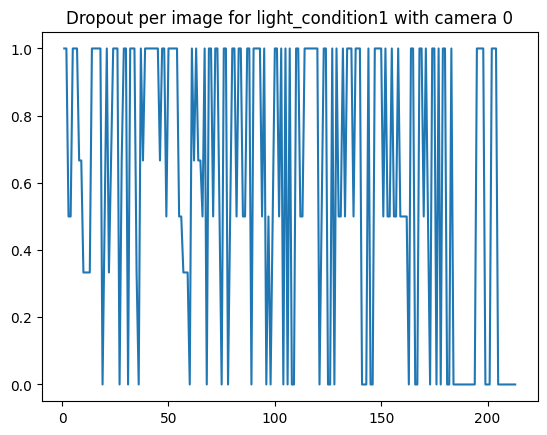

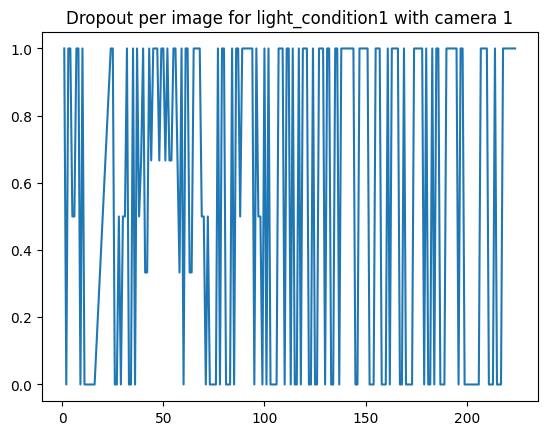

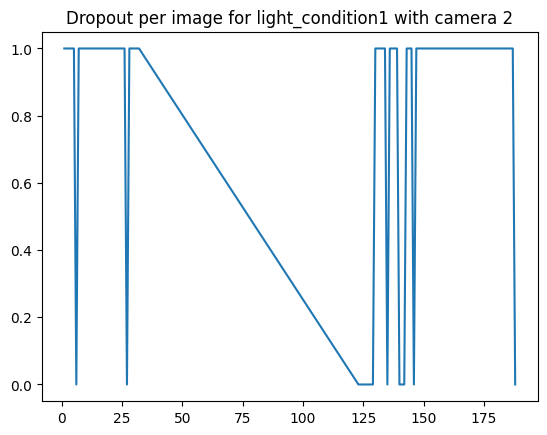

In [37]:
condition_name = 'light_condition1'
condition_folders = light_condition1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]

PREDICTED_PATH = '../../runs/detect/test_light_condition1_1024imgz_only_hurtigruta_correct/labels'

ground_truth_annots, predicted_detections = display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name='light_condition1')

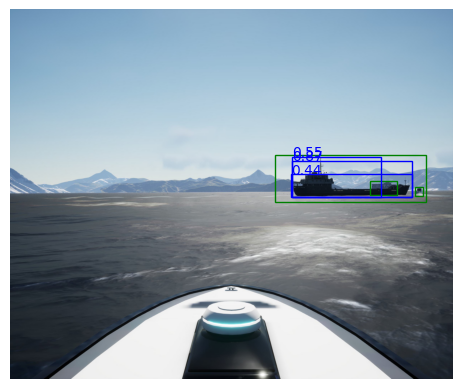

In [38]:
image_dir = GROUND_TRUTH_PATHS[0]+'/images/'

#['CAM00_img209', 'CAM00_img046', 'CAM00_img049', 'CAM00_img047']
ct = 0.59
for image in ['CAM00_img046']:
    display_predicted(image, image_dir, ground_truth_annots, predicted_detections, 0.2)

# Run tests after training on Hurtigruta and a mix of synthetic data
- The trained model is saved to: train_50e_1024imgz_mixed_synthetic_and_hurtigruta_correct_idun
- To run test for each condition run the python script test_each_synthetic_codnition.py

## Different light conditions

### Light condition 1

In [9]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_50e_1024imgz_mixed_synthetic_and_hurtigruta_correct_idun/weights/best.pt source='/cluster/home/solveijm/DNV_synthetic_data_w_pose/2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear/test.txt' imgsz=1024 name=test_light_condition1_1024imgz_hurtigruta_and_synthetic save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[402   1]
 [422   0]]
Precision:
0.9975186104218362
Recall:
0.4878640776699029


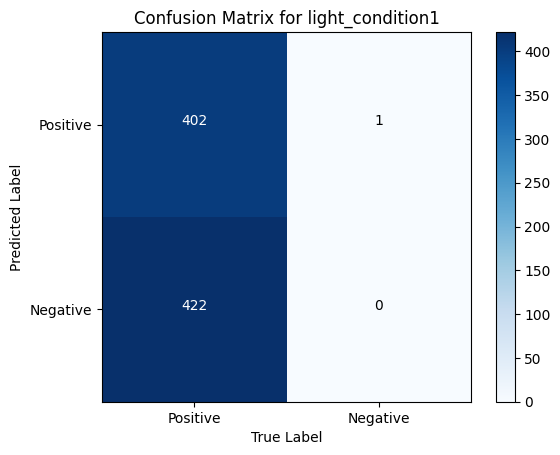

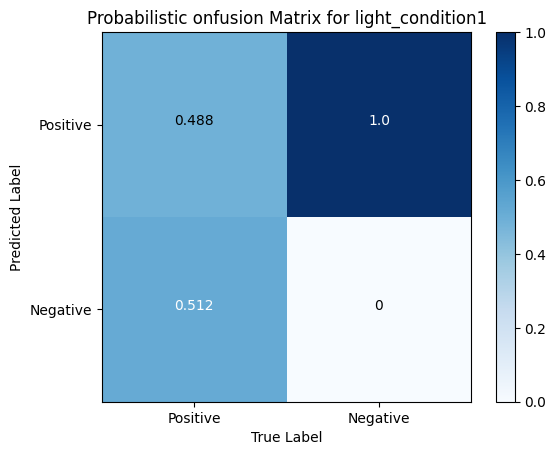



BOUNDING BOX ERRORS FOR light_condition1
IoU threshold:  0.5
Error of center x
213
Expected value: 0.790869550868482
Standard deviation: 2.659461174824374

Error of center y
245
Expected value: -0.6682952158808861
Standard deviation: 9.074345187006765

Error of width
213
Expected value: 0.9662938610421752
Standard deviation: 5.532562250297227

Error of height
137
Expected value: 2.3875113002481423
Standard deviation: 19.54341345202107


 DROPOUT STATS


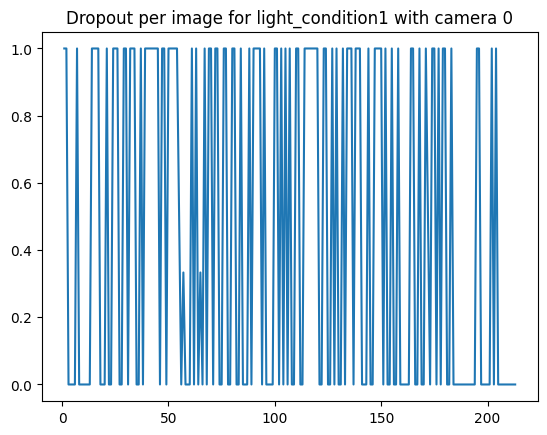

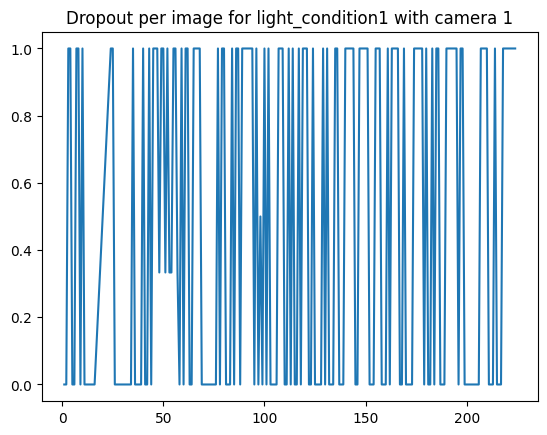

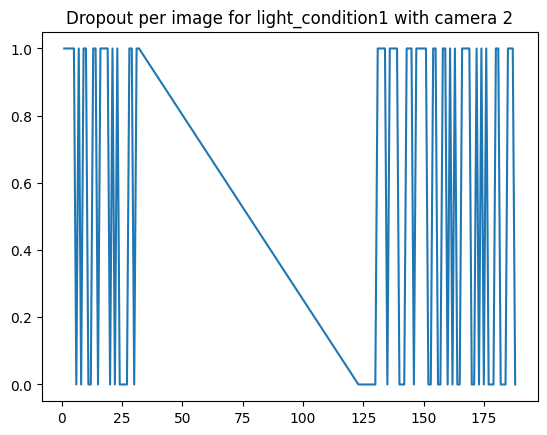

In [10]:
condition_name = 'light_condition1'
condition_folders = light_condition1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]

PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

ground_truth_annots, predicted_detections = display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name='light_condition1')

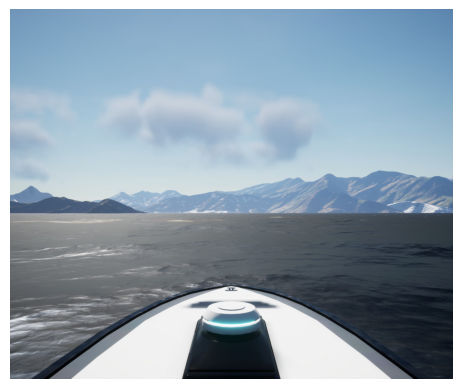

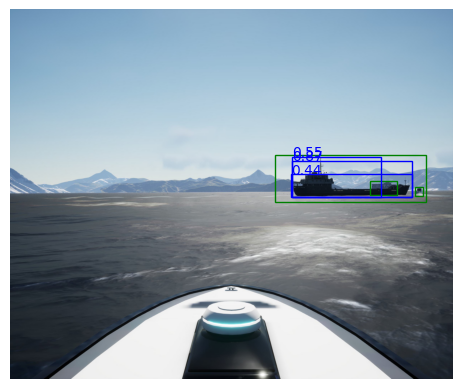

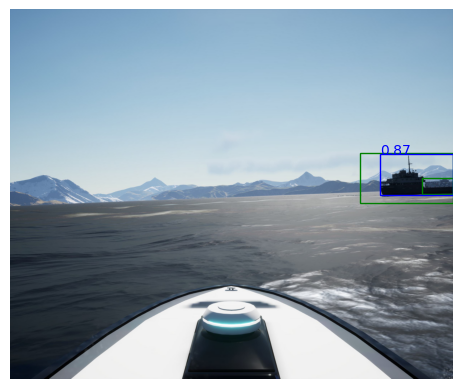

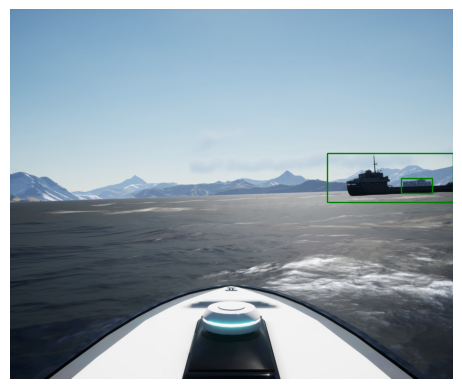

In [39]:
image_dir = GROUND_TRUTH_PATHS[0]+'/images/'

#['CAM00_img209', 'CAM00_img046', 'CAM00_img049', 'CAM00_img047']
for image in ['CAM00_img209', 'CAM00_img046', 'CAM00_img049', 'CAM00_img048']:
    display_predicted(image, image_dir, ground_truth_annots, predicted_detections, CONFIDENCE_THRESHOLD)

### Light condition 2

In [12]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_50e_1024imgz_mixed_synthetic_and_hurtigruta_correct_idun/weights/best.pt source='/cluster/home/solveijm/DNV_synthetic_data_w_pose/2023-05-09_1257_dnv_scenario1_full_00_000_AfternoonClear/test.txt' imgsz=1024 name=test_light_condition2_1024imgz_hurtigruta_and_synthetic save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[406   2]
 [431   0]]
Precision:
0.9950980392156863
Recall:
0.4850657108721625


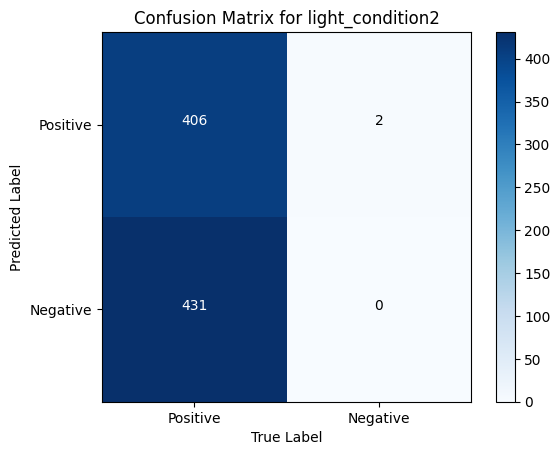

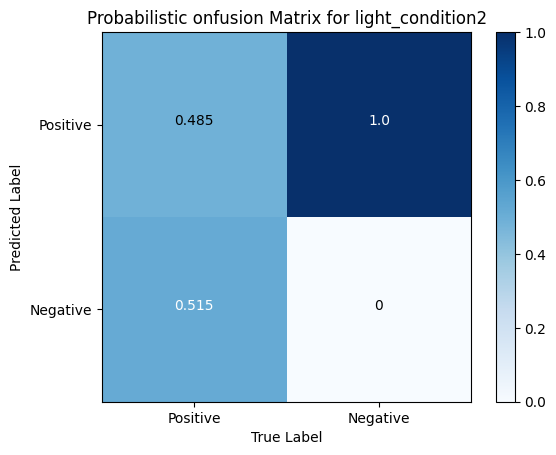



BOUNDING BOX ERRORS FOR light_condition2
IoU threshold:  0.5
Error of center x
10
Expected value: 0.34415348170731436
Standard deviation: 2.3587622830591974

Error of center y
294
Expected value: -0.39878085487804826
Standard deviation: 17.164404104686838

Error of width
8
Expected value: 0.2872789585365887
Standard deviation: 4.394823902922662

Error of height
91
Expected value: 2.1929620560975622
Standard deviation: 25.37064163787723


 DROPOUT STATS


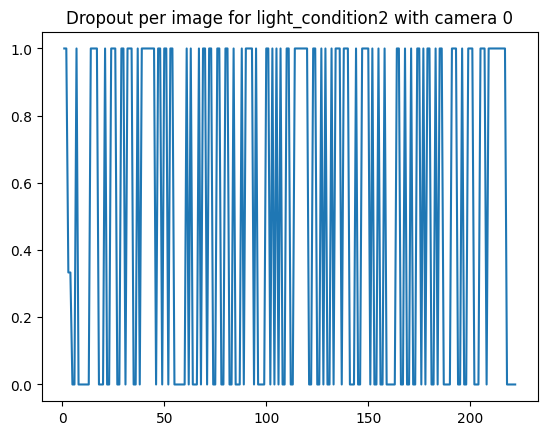

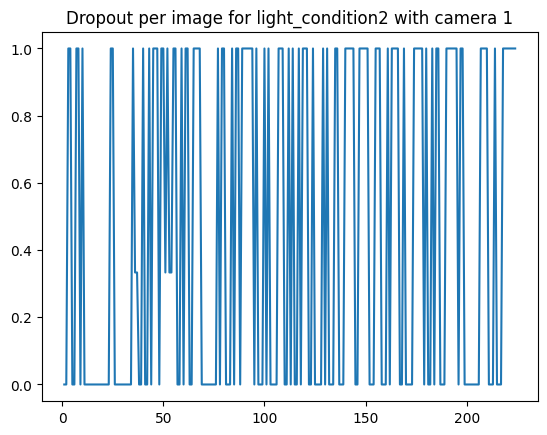

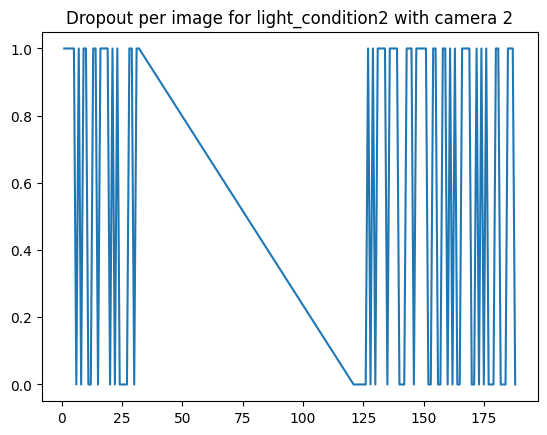

({'CAM00_img209': [{'class_id': 0,
    'x1': 2402.574951,
    'y1': 1079.790283,
    'x2': 2464,
    'y2': 1232.848511}],
  'CAM00_img220': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1938.249268,
    'y1': 992.521667,
    'x2': 2092.011963,
    'y2': 1070.101074},
   {'class_id': 0,
    'x1': 1473.894897,
    'y1': 816.607971,
    'x2': 2388.479004,
    'y2': 1114.631958},
   {'class_id': 0,
    'x1': 2201.093506,
    'y1': 971.801758,
    'x2': 2256.915283,
    'y2': 1082.45459}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 446.735046,
    'y1': 1005.271362,
    'x2': 500.243134,
    'y2': 1092.5271}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2079.127441,
    'y1': 880.457703,
    'x2': 2464,
    'y2': 1203.344238}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 542.982178,
    'y1': 1206.6875,
    'x2': 600.435791,
    'y2': 1296.986084}],
  'CAM01_img015': [],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 275.123566,
    'y1': 946.256775,
    'x2': 336

In [13]:
condition_name = 'light_condition2'
condition_folders = light_condition2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Light condition 3

In [14]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition3.txt' imgsz=640 name=test_light_condition3 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[395   3]
 [417   0]]
Precision:
0.992462311557789
Recall:
0.48645320197044334


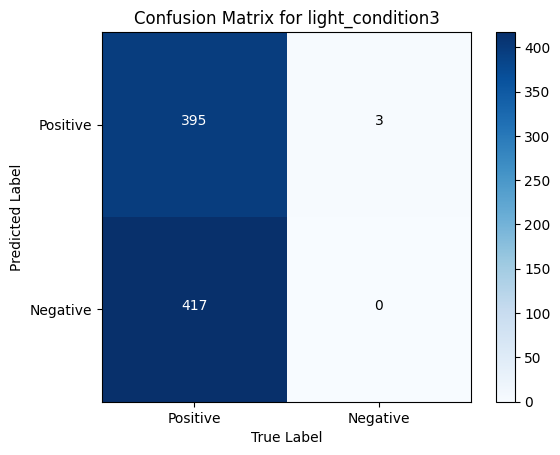

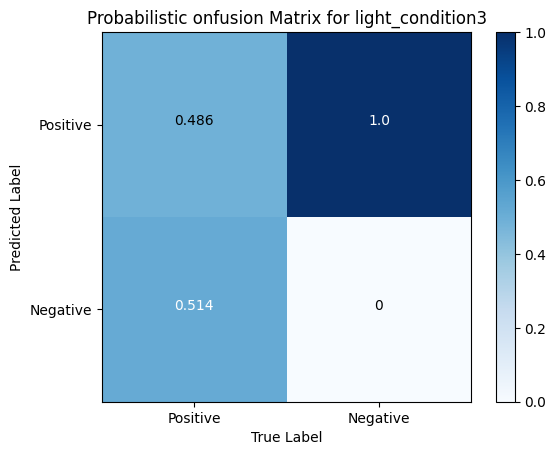



BOUNDING BOX ERRORS FOR light_condition3
IoU threshold:  0.5
Error of center x
8
Expected value: 0.7869642386934741
Standard deviation: 2.203526146478981

Error of center y
285
Expected value: 1.2861852286432147
Standard deviation: 17.0703392032955

Error of width
382
Expected value: 1.0064498743718642
Standard deviation: 3.5792236242907265

Error of height
133
Expected value: 3.5685710954773935
Standard deviation: 33.04385812824279


 DROPOUT STATS


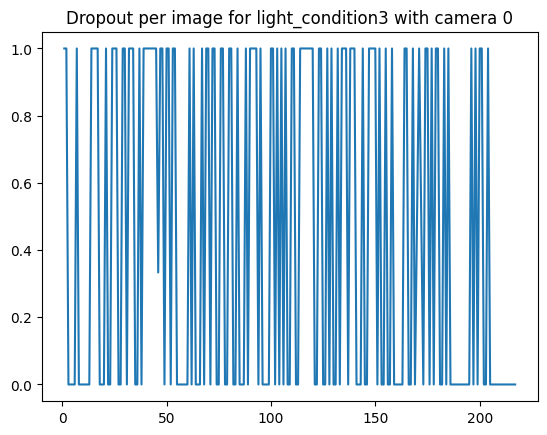

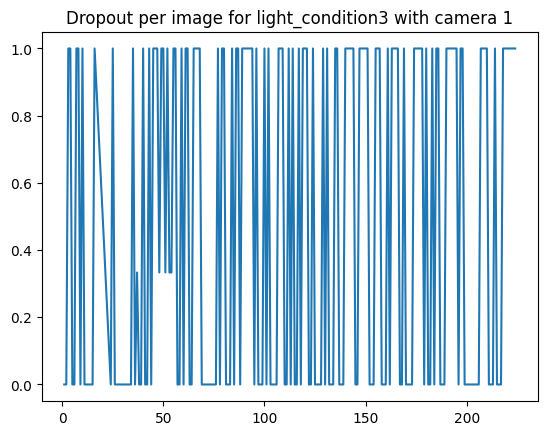

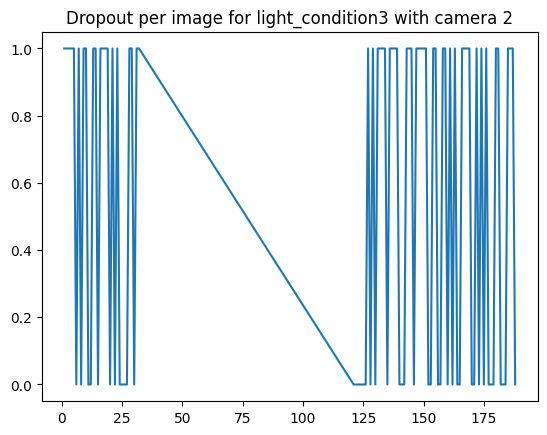

({'CAM00_img209': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1927.133423,
    'y1': 1065.323608,
    'x2': 2079.428711,
    'y2': 1142.803589},
   {'class_id': 0,
    'x1': 1453.178467,
    'y1': 892.094727,
    'x2': 2347.697021,
    'y2': 1181.512085},
   {'class_id': 0,
    'x1': 2190.008789,
    'y1': 1097.964844,
    'x2': 2231.927246,
    'y2': 1149.950562}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 429.074066,
    'y1': 1054.875488,
    'x2': 463.36615,
    'y2': 1095.811523}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2081.890869,
    'y1': 878.865356,
    'x2': 2464,
    'y2': 1185.190308}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 537.617188,
    'y1': 1112.999878,
    'x2': 574.103943,
    'y2': 1155.258179}],
  'CAM01_img015': [],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 280.892517,
    'y1': 1083.045532,
    'x2': 319.674652,
    'y2': 1125.221313}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 461.394989,
    'y1': 1048.440308,
 

In [15]:
condition_name = 'light_condition3'
condition_folders = light_condition3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Light condition 4

In [16]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition3.txt' imgsz=640 name=test_light_condition3 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[392   4]
 [418   0]]
Precision:
0.98989898989899
Recall:
0.4839506172839506


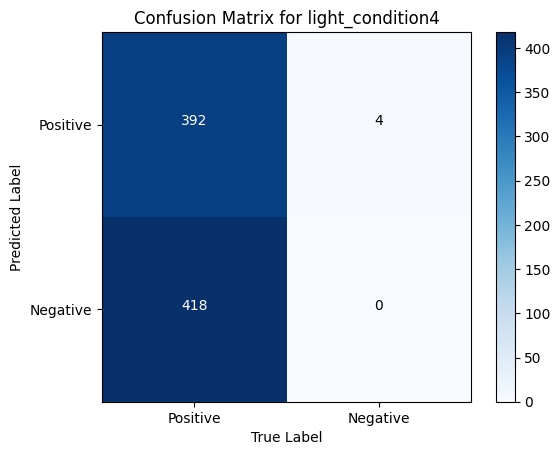

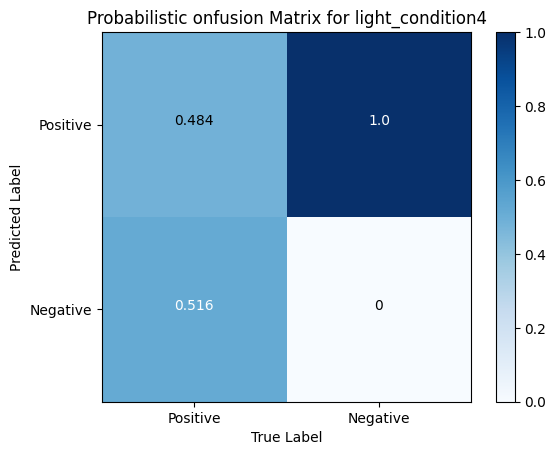



BOUNDING BOX ERRORS FOR light_condition4
IoU threshold:  0.5
Error of center x
339
Expected value: 0.8648334745547127
Standard deviation: 1.8680998622555511

Error of center y
280
Expected value: 1.8046460585241777
Standard deviation: 15.053291913314972

Error of width
204
Expected value: 1.0201073002544612
Standard deviation: 3.8088820401497694

Error of height
219
Expected value: 4.257594961832063
Standard deviation: 34.16649545678257


 DROPOUT STATS


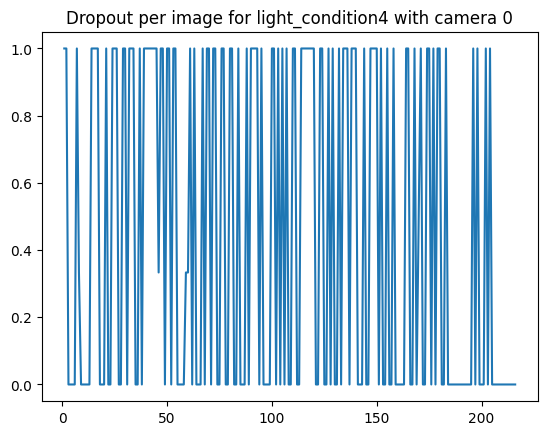

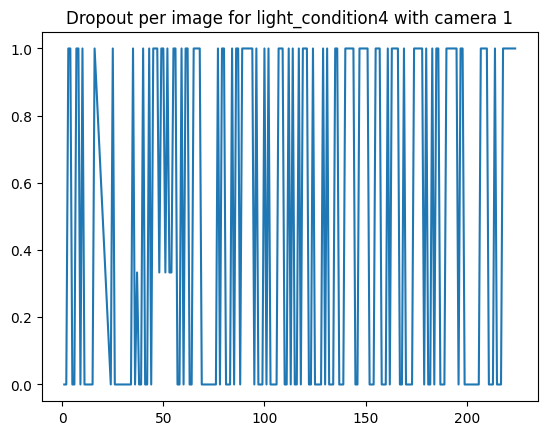

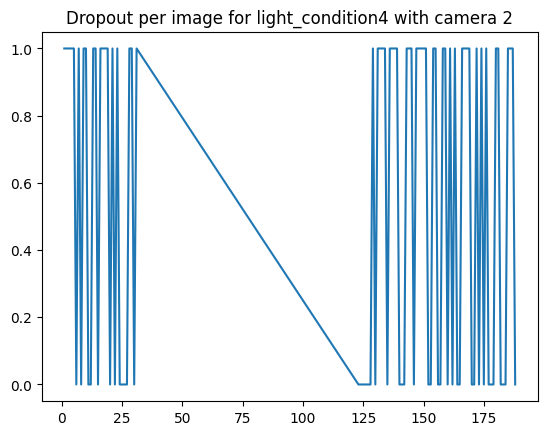

({'CAM00_img209': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1958.653687,
    'y1': 1029.064331,
    'x2': 2100.985107,
    'y2': 1106.653687},
   {'class_id': 0,
    'x1': 1453.061279,
    'y1': 857.731384,
    'x2': 2334.552734,
    'y2': 1146.772827},
   {'class_id': 0,
    'x1': 2202.719727,
    'y1': 1062.702148,
    'x2': 2244.765137,
    'y2': 1114.782837}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 449.838776,
    'y1': 1028.079224,
    'x2': 484.244659,
    'y2': 1069.111938}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2109.403564,
    'y1': 893.192017,
    'x2': 2464,
    'y2': 1204.873047}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 549.226135,
    'y1': 1221.8573,
    'x2': 585.711792,
    'y2': 1264.584229}],
  'CAM01_img015': [],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 285.536438,
    'y1': 1019.662048,
    'x2': 324.462646,
    'y2': 1061.700806}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 521.399719,
    'y1': 989.16156,
    

In [17]:
condition_name = 'light_condition4'
condition_folders = light_condition4
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Cloud in various light conditions

### Cloud and light1

In [18]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light1.txt' imgsz=640 name=test_cloud_light1 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[428   1]
 [455   0]]
Precision:
0.9976689976689976
Recall:
0.48471121177802945


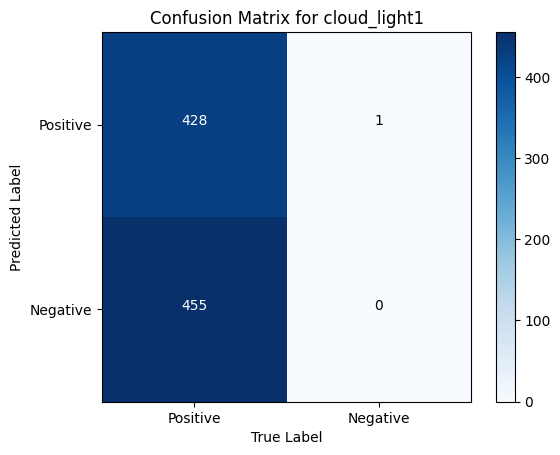

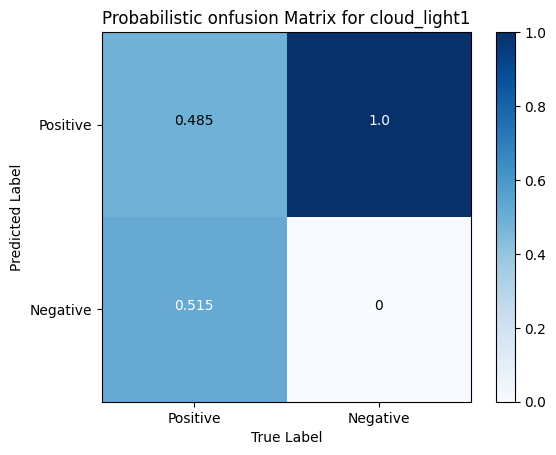



BOUNDING BOX ERRORS FOR cloud_light1
IoU threshold:  0.5
Error of center x
384
Expected value: 0.983645390951274
Standard deviation: 2.8360618395269244

Error of center y
308
Expected value: 2.1466368654292296
Standard deviation: 17.59924028931388

Error of width
384
Expected value: 1.3340122807424613
Standard deviation: 5.492857426367962

Error of height
145
Expected value: 5.4227400464037165
Standard deviation: 41.17147863316824


 DROPOUT STATS


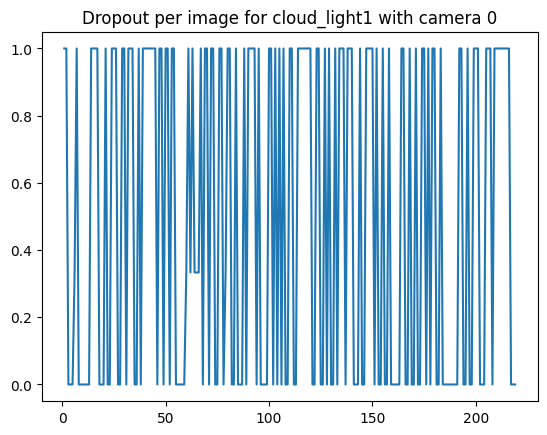

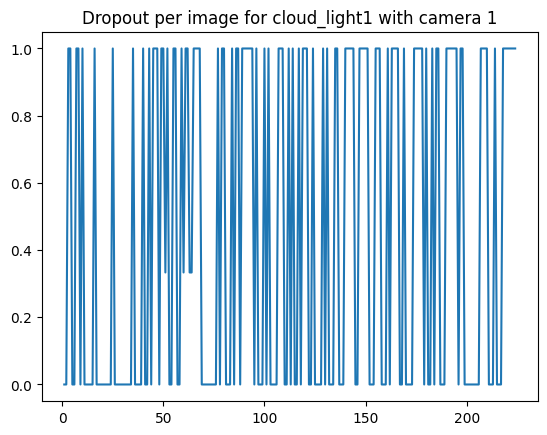

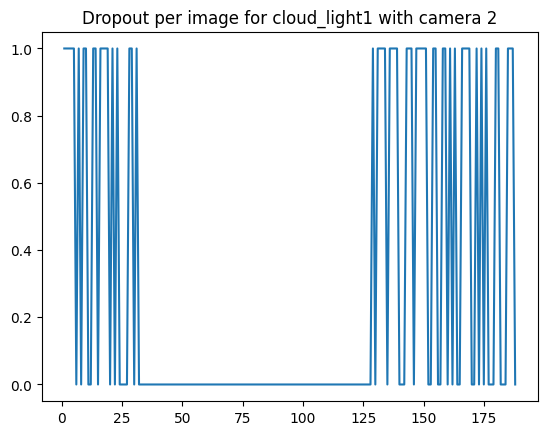

({'CAM00_img209': [{'class_id': 0,
    'x1': 2412.349365,
    'y1': 1176.696411,
    'x2': 2464,
    'y2': 1257.544678}],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1946.529907,
    'y1': 1076.202637,
    'x2': 2090.077393,
    'y2': 1154.115723},
   {'class_id': 0,
    'x1': 1292.822632,
    'y1': 938.252075,
    'x2': 2100.106201,
    'y2': 1180.267944},
   {'class_id': 0,
    'x1': 2189.937988,
    'y1': 1099.948608,
    'x2': 2225.114258,
    'y2': 1159.967773}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 424.450745,
    'y1': 1096.48999,
    'x2': 454.227264,
    'y2': 1144.150269}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2101.085205,
    'y1': 909.412964,
    'x2': 2464,
    'y2': 1148.364502}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 532.759827,
    'y1': 1030.841064,
    'x2': 565.443481,
    'y2': 1079.565186}],
  'CAM01_img015': [],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 2255.42041,
    'y1': 920.223694,
    'x2': 2464,
    'y2': 117

In [19]:
condition_name = 'cloud_light1'
condition_folders = cloud_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD ,IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light2

In [20]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light2.txt' imgsz=640 name=test_cloud_light2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[395   0]
 [413   0]]
Precision:
1.0
Recall:
0.48886138613861385


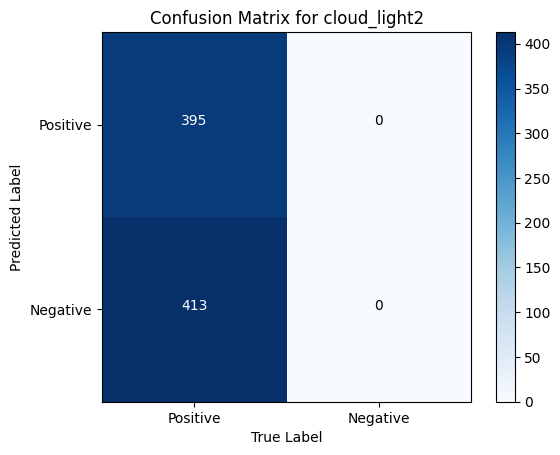

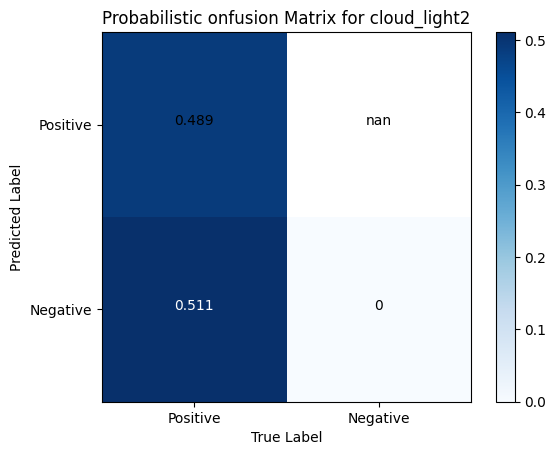



BOUNDING BOX ERRORS FOR cloud_light2
IoU threshold:  0.5
Error of center x
8
Expected value: 0.5807127148241218
Standard deviation: 3.391283785407423

Error of center y
95
Expected value: -0.4167311092964816
Standard deviation: 10.724027388195994

Error of width
38
Expected value: 0.37450920351758776
Standard deviation: 3.8101648121390577

Error of height
89
Expected value: 2.706691922110556
Standard deviation: 16.500767463427973


 DROPOUT STATS


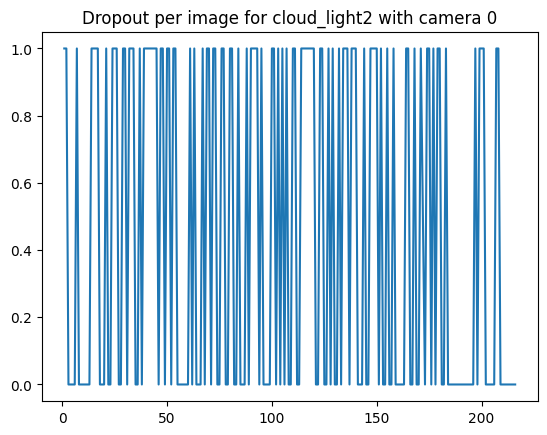

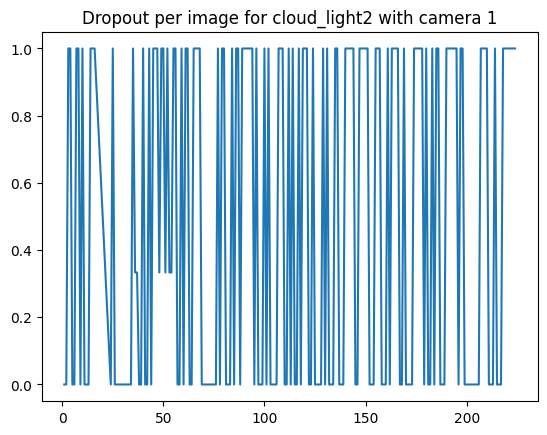

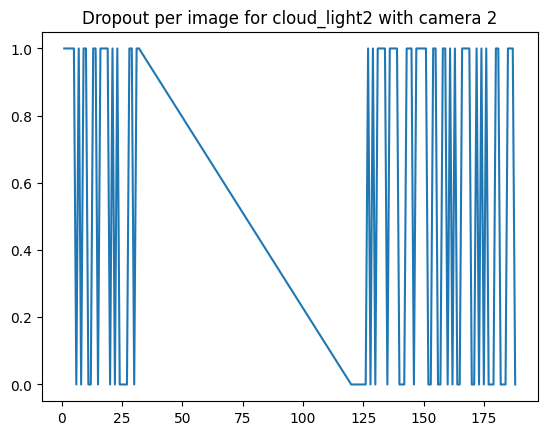

({'CAM00_img209': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1920.442993,
    'y1': 1061.539185,
    'x2': 2074.154053,
    'y2': 1139.877808},
   {'class_id': 0,
    'x1': 1454.734497,
    'y1': 891.446777,
    'x2': 2362.534424,
    'y2': 1182.315308},
   {'class_id': 0,
    'x1': 2190.216553,
    'y1': 1090.006714,
    'x2': 2232.521484,
    'y2': 1141.986084}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 433.584778,
    'y1': 1230.333252,
    'x2': 467.877655,
    'y2': 1271.728394}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2065.479492,
    'y1': 833.883667,
    'x2': 2464,
    'y2': 1120.932373}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 521.157776,
    'y1': 982.254639,
    'x2': 558.03186,
    'y2': 1024.595215}],
  'CAM01_img118': [{'class_id': 0,
    'x1': 276.589142,
    'y1': 1141.202393,
    'x2': 315.503967,
    'y2': 1183.452759}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 466.270264,
    'y1': 1085.130615,
    'x2': 644.129089,
    'y2': 1163.838257},


In [25]:
condition_name = 'cloud_light2'
condition_folders = cloud_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light 3

In [22]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light3.txt' imgsz=640 name=test_cloud_light3 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  0 406]
 [  0   0]]
Precision:
0.0
Recall:
0


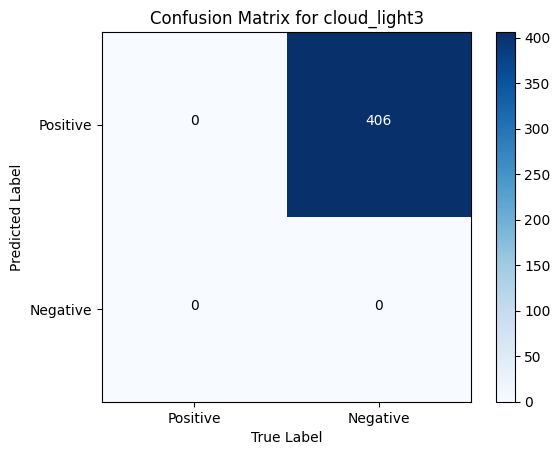

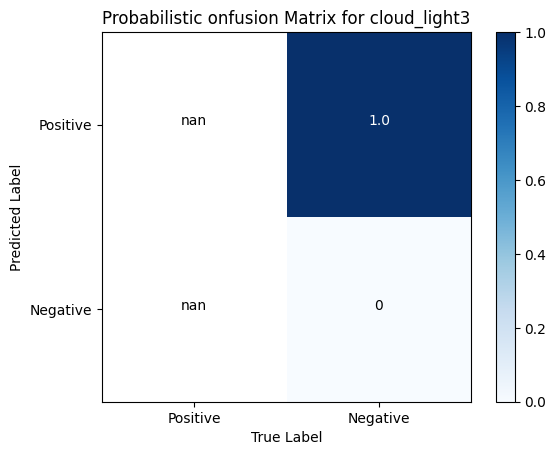



BOUNDING BOX ERRORS FOR cloud_light3
IoU threshold:  0.5
Error of center x


ZeroDivisionError: division by zero

In [26]:
condition_name = 'cloud_light3'
condition_folders = cloud_light3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light4

In [ ]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light2.txt' imgsz=640 name=test_cloud_light2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[402   2]
 [444   0]]
Precision:
0.995049504950495
Recall:
0.475177304964539


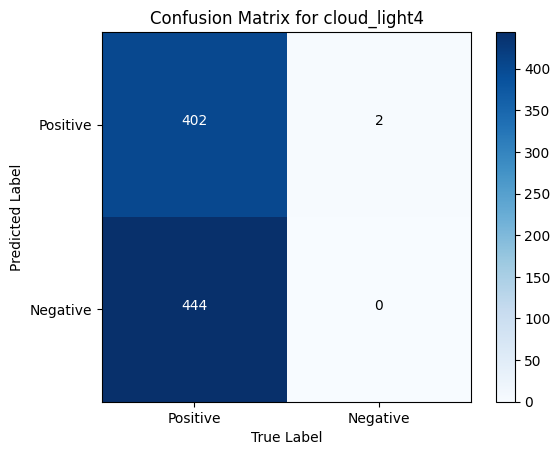

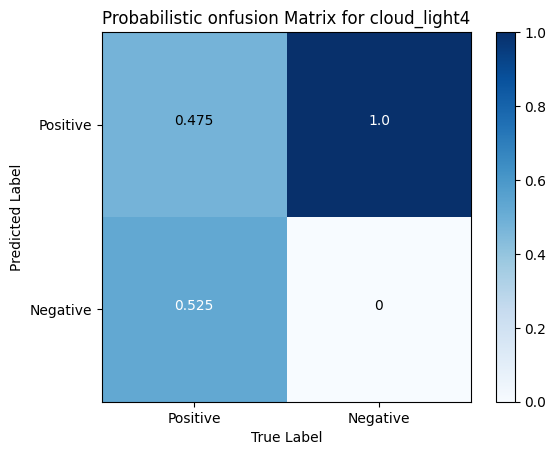



BOUNDING BOX ERRORS FOR cloud_light4
IoU threshold:  0.5
Error of center x
101
Expected value: 0.2811208106435678
Standard deviation: 2.0843168028378796

Error of center y
96
Expected value: -0.6174451658415854
Standard deviation: 12.435088257472998

Error of width
8
Expected value: 0.6298401559405912
Standard deviation: 4.3723735043603265

Error of height
90
Expected value: 2.6602056435643604
Standard deviation: 17.88236100340315


 DROPOUT STATS


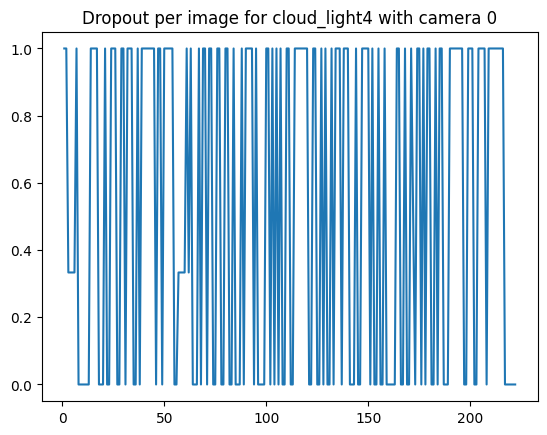

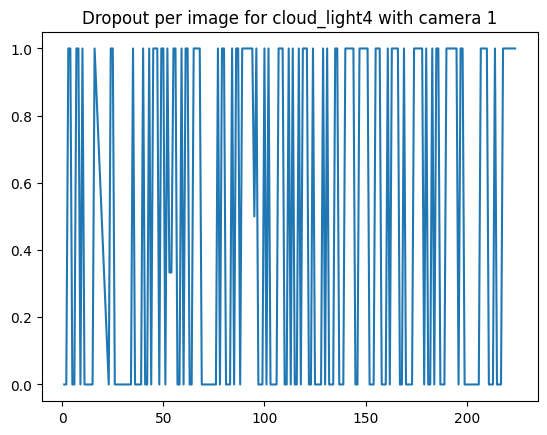

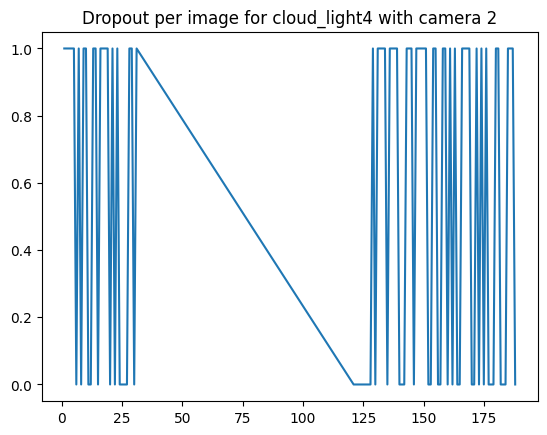

({'CAM00_img209': [{'class_id': 0,
    'x1': 2402.056885,
    'y1': 1068.393555,
    'x2': 2464,
    'y2': 1219.338135}],
  'CAM00_img220': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1930.769775,
    'y1': 1048.366943,
    'x2': 2080.999512,
    'y2': 1126.927002},
   {'class_id': 0,
    'x1': 1423.053955,
    'y1': 899.979797,
    'x2': 2287.490234,
    'y2': 1169.675415},
   {'class_id': 0,
    'x1': 2186.58252,
    'y1': 1022.642883,
    'x2': 2246.859131,
    'y2': 1132.793457}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 435.672089,
    'y1': 1187.095581,
    'x2': 486.740509,
    'y2': 1275.776855}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2123.214355,
    'y1': 855.040161,
    'x2': 2464,
    'y2': 1113.835571}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 512.417969,
    'y1': 973.087524,
    'x2': 571.546692,
    'y2': 1064.227783}],
  'CAM01_img015': [],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 266.706909,
    'y1': 1091.874878,
    'x2

In [27]:
condition_name = 'cloud_light4'
condition_folders = cloud_light4
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Rain

### Rain light 1

In [ ]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light1.txt' imgsz=640 name=test_rain_light1 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[397   0]
 [411   0]]
Precision:
1.0
Recall:
0.49133663366336633


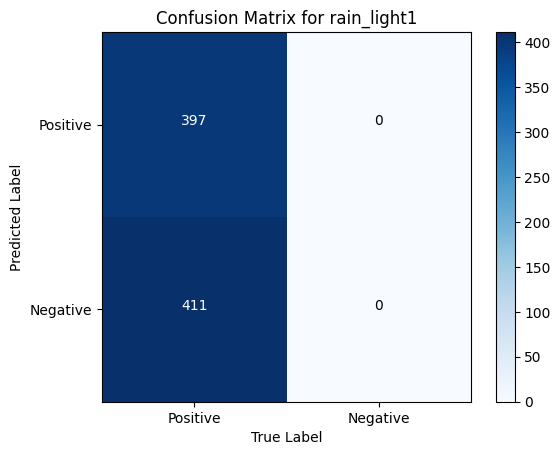

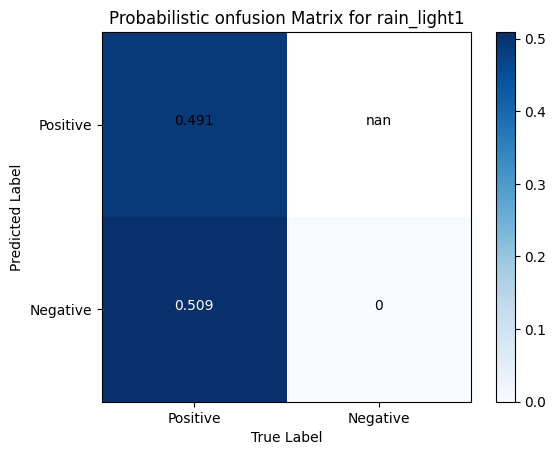



BOUNDING BOX ERRORS FOR rain_light1
IoU threshold:  0.5
Error of center x
34
Expected value: 0.8919851984924657
Standard deviation: 2.6570981819302175

Error of center y
251
Expected value: -2.160337885678394
Standard deviation: 13.9459620923465

Error of width
295
Expected value: 0.109840979899493
Standard deviation: 5.3596398372779746

Error of height
285
Expected value: 3.3828555653266354
Standard deviation: 17.098183471352478


 DROPOUT STATS


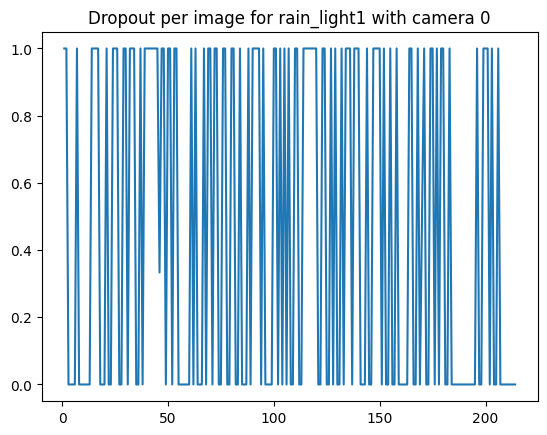

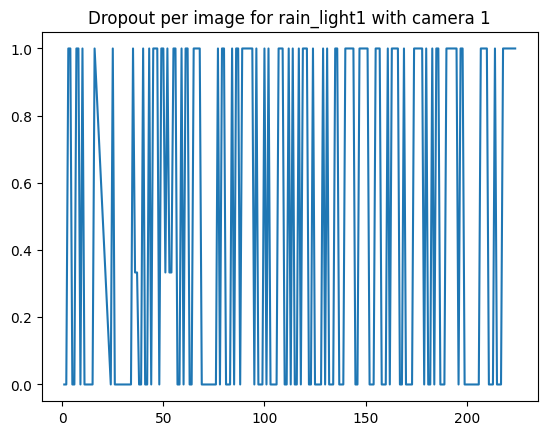

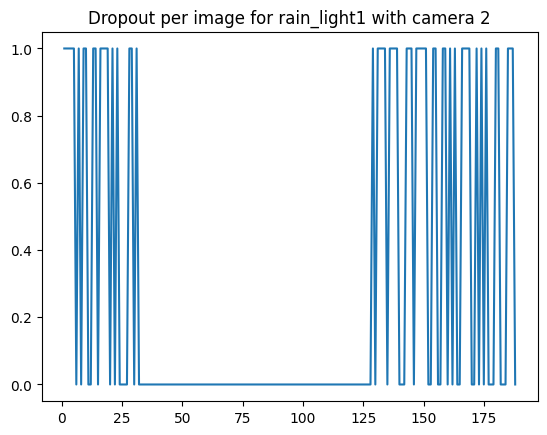

({'CAM00_img209': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1930.374146,
    'y1': 974.385315,
    'x2': 2082.644531,
    'y2': 1052.893066},
   {'class_id': 0,
    'x1': 1456.614258,
    'y1': 796.716553,
    'x2': 2384.859619,
    'y2': 1097.517822},
   {'class_id': 0,
    'x1': 2193.861328,
    'y1': 1002.706543,
    'x2': 2236.242432,
    'y2': 1054.759888}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 476.482574,
    'y1': 1244.303101,
    'x2': 510.433563,
    'y2': 1285.414429}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2034.977783,
    'y1': 820.746826,
    'x2': 2464,
    'y2': 1127.154907}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 514.617249,
    'y1': 1247.928345,
    'x2': 551.440002,
    'y2': 1290.69104}],
  'CAM01_img015': [],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 275.57135,
    'y1': 1032.025879,
    'x2': 314.595154,
    'y2': 1074.176514}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 465.911407,
    'y1': 989.662659,
    

In [28]:
condition_name = 'rain_light1'
condition_folders = rain_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Rain light 2

In [29]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light2.txt' imgsz=640 name=test_rain_light2 save=True save_conf=True save_txt=True


In [30]:
condition_name = 'rain_light2'
condition_folders = rain_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

FileNotFoundError: [Errno 2] No such file or directory: '../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_rain_light2/labels'

### Rain light 3

In [ ]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light2.txt' imgsz=640 name=test_rain_light2 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[400   2]
 [423   0]]
Precision:
0.9950248756218906
Recall:
0.48602673147023084


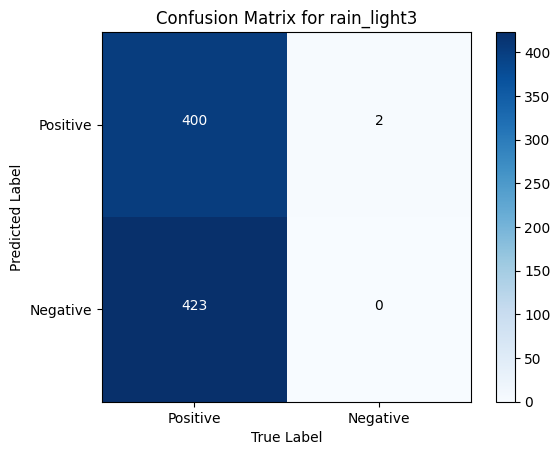

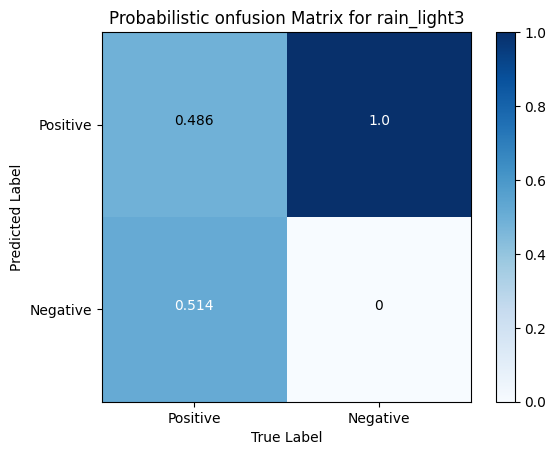



BOUNDING BOX ERRORS FOR rain_light3
IoU threshold:  0.5
Error of center x
72
Expected value: 0.8018428308457713
Standard deviation: 2.4444950343064678

Error of center y
228
Expected value: 1.406729671641786
Standard deviation: 13.552794178165643

Error of width
49
Expected value: 1.282256044776124
Standard deviation: 4.500213397950591

Error of height
228
Expected value: 4.257851646766171
Standard deviation: 35.59992378678801


 DROPOUT STATS


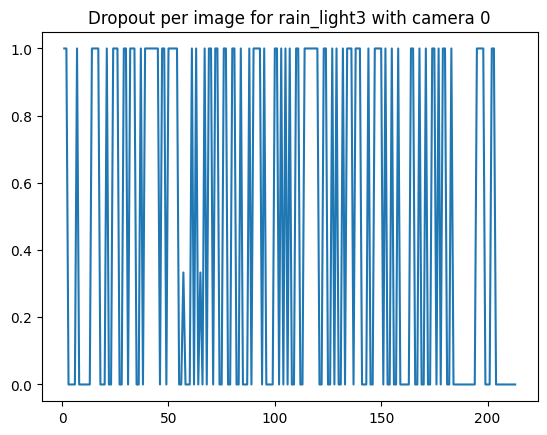

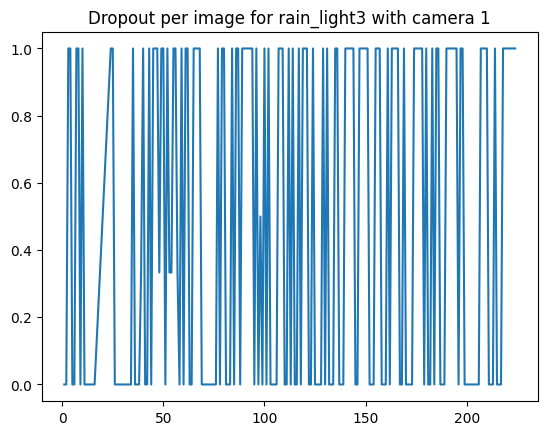

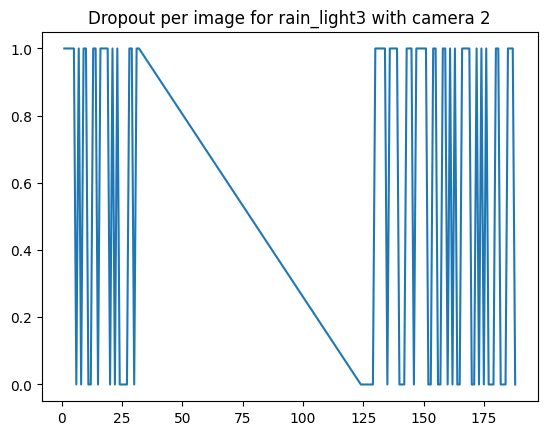

({'CAM00_img209': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1974.106689,
    'y1': 980.850708,
    'x2': 2113.197021,
    'y2': 1058.831787},
   {'class_id': 0,
    'x1': 1365.66333,
    'y1': 826.625732,
    'x2': 2197.644775,
    'y2': 1091.613037},
   {'class_id': 0,
    'x1': 2211.542969,
    'y1': 1013.140503,
    'x2': 2253.908691,
    'y2': 1065.581909}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 460.592957,
    'y1': 1034.170654,
    'x2': 495.255066,
    'y2': 1075.411743}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2127.551514,
    'y1': 905.033997,
    'x2': 2464,
    'y2': 1179.666138}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 554.701782,
    'y1': 1279.0896,
    'x2': 591.339966,
    'y2': 1322.331055}],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 287.25235,
    'y1': 977.24292,
    'x2': 326.382751,
    'y2': 1019.460938}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 566.141907,
    'y1': 950.233582,
    'x2': 726.954956,
    'y2'

In [31]:
condition_name = 'rain_light3'
condition_folders = rain_light3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Fog

In [ ]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_foggy.txt' imgsz=640 name=test_foggy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[401  17]
 [437   0]]
Precision:
0.9593301435406698
Recall:
0.4785202863961814


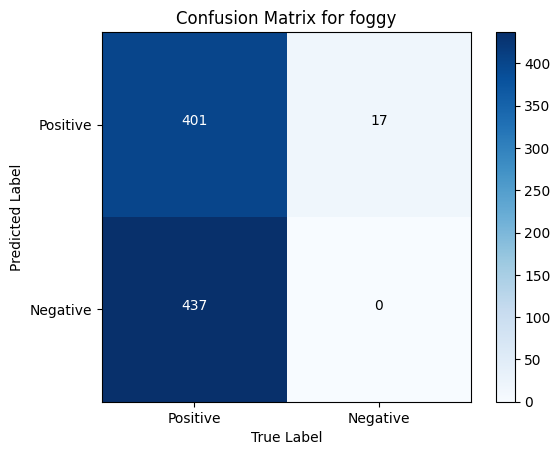

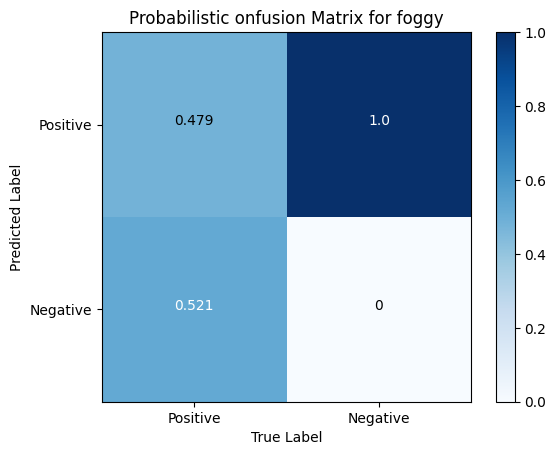



BOUNDING BOX ERRORS FOR foggy
IoU threshold:  0.5
Error of center x
108
Expected value: 0.9101985123456782
Standard deviation: 5.820736753839802

Error of center y
138
Expected value: -0.3374953604938288
Standard deviation: 8.187856905587095

Error of width
256
Expected value: -0.27397408148148367
Standard deviation: 6.188359203237228

Error of height
308
Expected value: 1.5046752395061733
Standard deviation: 12.984685894854056


 DROPOUT STATS


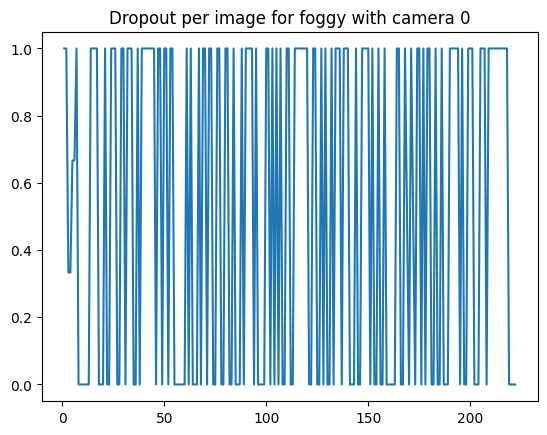

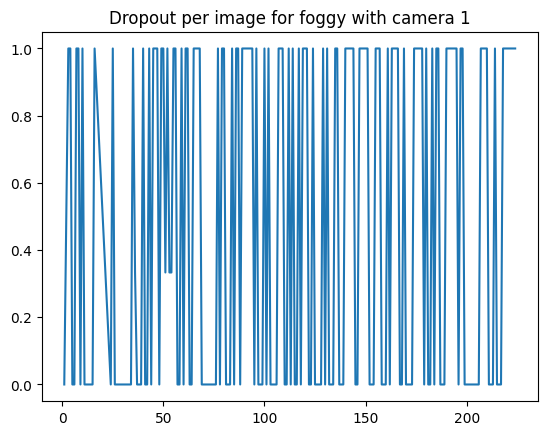

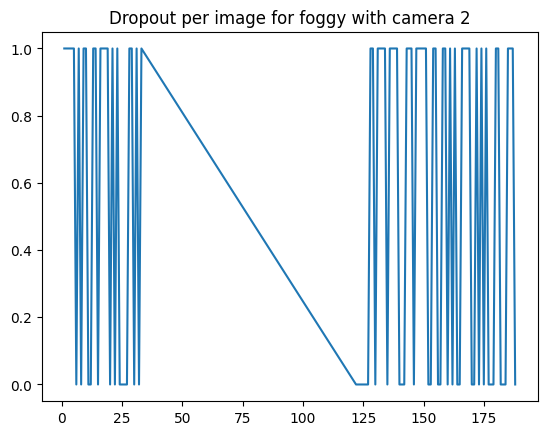

({'CAM00_img209': [{'class_id': 0,
    'x1': 2392.276855,
    'y1': 1090.987793,
    'x2': 2464,
    'y2': 1241.741577}],
  'CAM00_img220': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1938.132324,
    'y1': 1062.018188,
    'x2': 2084.625732,
    'y2': 1140.468018},
   {'class_id': 0,
    'x1': 1447.656616,
    'y1': 885.240601,
    'x2': 2394.362793,
    'y2': 1193.945312},
   {'class_id': 0,
    'x1': 2180.16333,
    'y1': 1037.323242,
    'x2': 2239.724609,
    'y2': 1147.51062}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 422.173218,
    'y1': 1167.590454,
    'x2': 473.053711,
    'y2': 1256.08667}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 1994.152344,
    'y1': 831.280579,
    'x2': 2464,
    'y2': 1129.348999}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 510.793823,
    'y1': 902.044434,
    'x2': 570.092285,
    'y2': 993.578308}],
  'CAM01_img015': [],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 264.318146,
    'y1': 1102.131104,
    'x2': 

In [32]:
condition_name = 'foggy'
condition_folders = foggy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Fog and clouds

In [ ]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_foggy.txt' imgsz=640 name=test_foggy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[392  15]
 [430   0]]
Precision:
0.9631449631449631
Recall:
0.4768856447688564


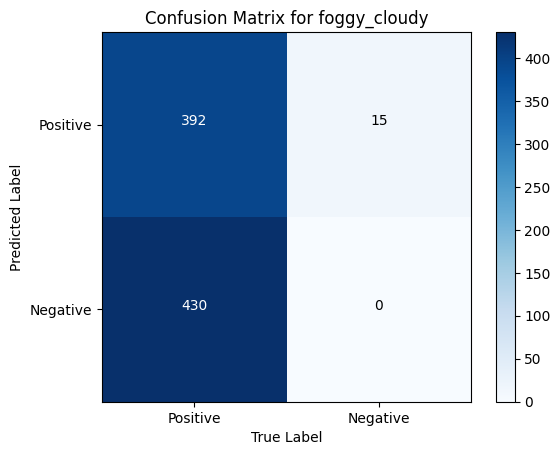

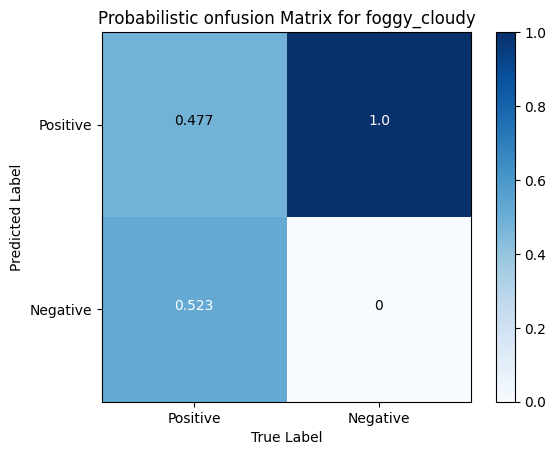



BOUNDING BOX ERRORS FOR foggy_cloudy
IoU threshold:  0.5
Error of center x
249
Expected value: 0.8482950532994973
Standard deviation: 2.3327040499030374

Error of center y
86
Expected value: -1.0928049505076167
Standard deviation: 14.971219948265265

Error of width
249
Expected value: 0.777180802030456
Standard deviation: 5.34033647694018

Error of height
132
Expected value: 1.6674845913705583
Standard deviation: 24.190549825828803


 DROPOUT STATS


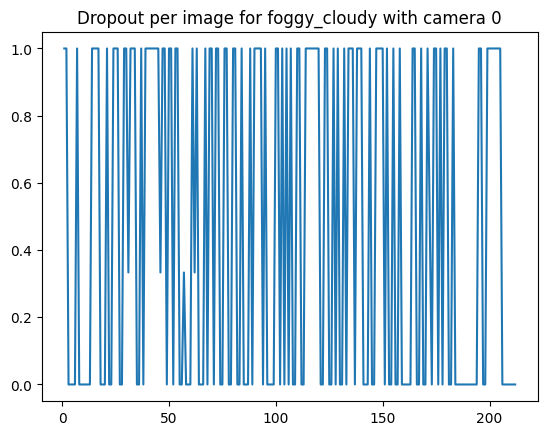

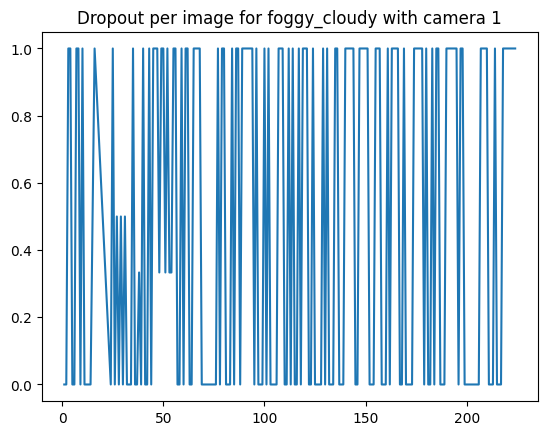

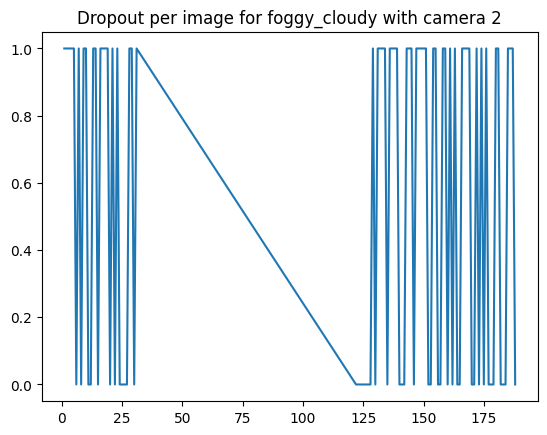

({'CAM00_img209': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1954.349121,
    'y1': 958.562805,
    'x2': 2099.50415,
    'y2': 1036.610596},
   {'class_id': 0,
    'x1': 1422.240723,
    'y1': 802.160706,
    'x2': 2279.403076,
    'y2': 1071.836548},
   {'class_id': 0,
    'x1': 2208.363281,
    'y1': 1005.835999,
    'x2': 2230.310547,
    'y2': 1036.643677}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 486.974304,
    'y1': 1062.794189,
    'x2': 505.390411,
    'y2': 1086.286255}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2126.238037,
    'y1': 876.04248,
    'x2': 2464,
    'y2': 1163.463623}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 548.432739,
    'y1': 1336.278564,
    'x2': 568.290466,
    'y2': 1362.207764}],
  'CAM01_img118': [{'class_id': 0,
    'x1': 287.029388,
    'y1': 976.084351,
    'x2': 308.012177,
    'y2': 1000.656067}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 517.24408,
    'y1': 945.180786,
    'x2': 685.082581,
    'y2': 1025.007568},
   {

In [33]:
condition_name = 'foggy_cloudy'
condition_folders = foggy_cloudy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy

In [ ]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy.txt' imgsz=640 name=test_stormy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[408   4]
 [428   0]]
Precision:
0.9902912621359223
Recall:
0.4880382775119617


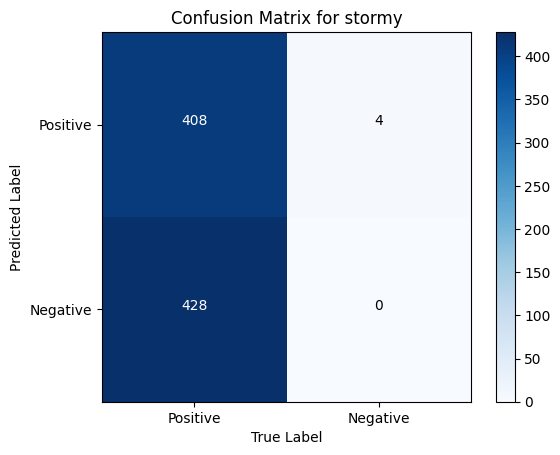

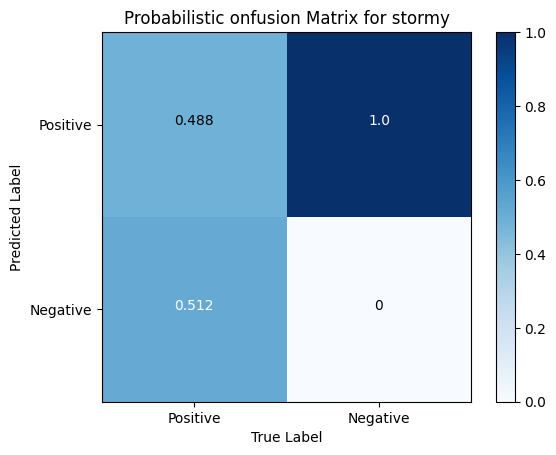



BOUNDING BOX ERRORS FOR stormy
IoU threshold:  0.5
Error of center x
307
Expected value: 0.5852678312958453
Standard deviation: 2.692353279008285

Error of center y
58
Expected value: -1.3135169657701724
Standard deviation: 6.410907345693561

Error of width
307
Expected value: -0.21247808801956286
Standard deviation: 6.149874289892646

Error of height
89
Expected value: 2.8117556088019606
Standard deviation: 19.117177690290195


 DROPOUT STATS


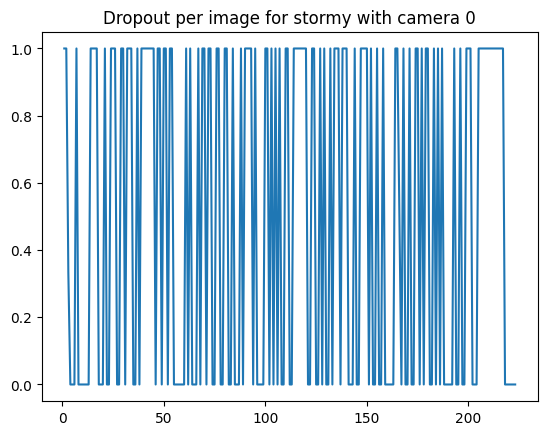

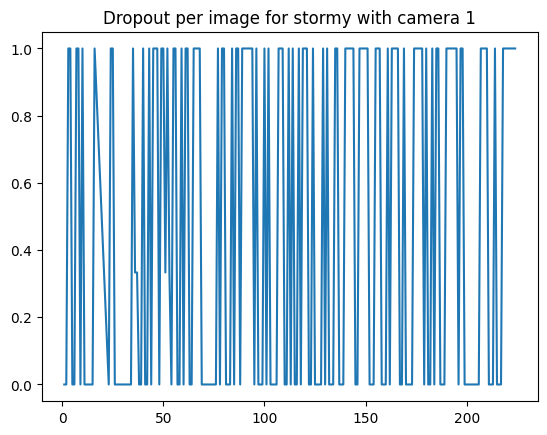

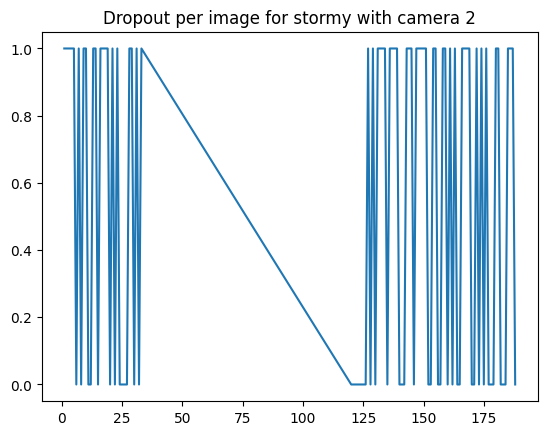

({'CAM00_img209': [{'class_id': 0,
    'x1': 2405.603027,
    'y1': 1037.796143,
    'x2': 2464,
    'y2': 1189.893799}],
  'CAM00_img220': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1936.084106,
    'y1': 976.162048,
    'x2': 2090.670166,
    'y2': 1053.876221},
   {'class_id': 0,
    'x1': 1466.884399,
    'y1': 771.971985,
    'x2': 2432.460938,
    'y2': 1095.790771},
   {'class_id': 0,
    'x1': 2204.144775,
    'y1': 954.513062,
    'x2': 2259.971436,
    'y2': 1065.054688}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 461.386169,
    'y1': 974.149292,
    'x2': 514.406006,
    'y2': 1061.19812}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 1981.845947,
    'y1': 845.173889,
    'x2': 2464,
    'y2': 1200.543335}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 546.645325,
    'y1': 1263.296143,
    'x2': 604.417358,
    'y2': 1354.179443}],
  'CAM01_img015': [],
  'CAM00_img187': [{'class_id': 0,
    'x1': 2462.736328,
    'y1': 1133.22876,
    'x2': 2464,
    'y2': 1256.

In [34]:
condition_name = 'stormy'
condition_folders = stormy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy and rain

In [ ]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy_rain.txt' imgsz=640 name=test_stormy_rain save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[393  18]
 [414   0]]
Precision:
0.9562043795620438
Recall:
0.48698884758364314


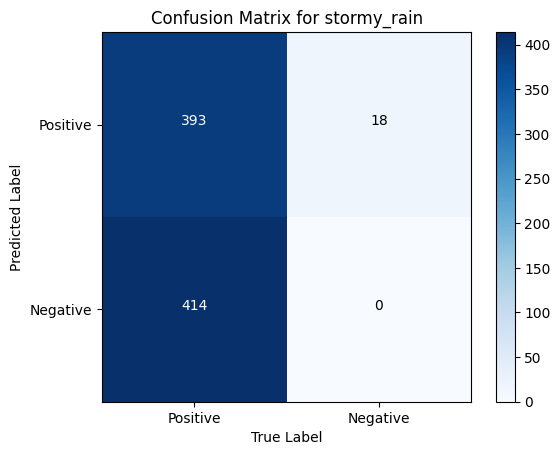

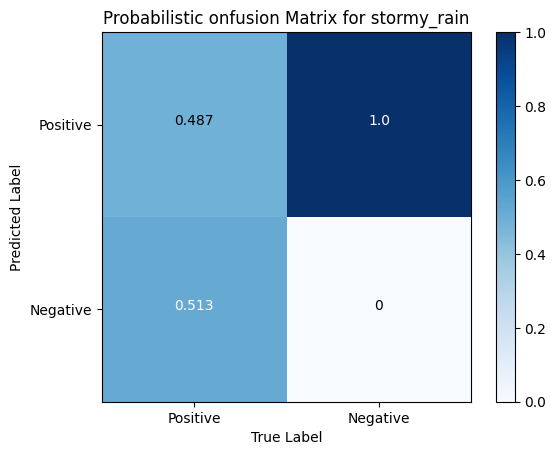



BOUNDING BOX ERRORS FOR stormy_rain
IoU threshold:  0.5
Error of center x
117
Expected value: 1.0784979221105535
Standard deviation: 9.159620510465034

Error of center y
93
Expected value: -0.36147254648240484
Standard deviation: 10.713538626275248

Error of width
117
Expected value: 0.9285269045226084
Standard deviation: 18.800436503543068

Error of height
224
Expected value: 3.726306595477384
Standard deviation: 22.938023855646136


 DROPOUT STATS


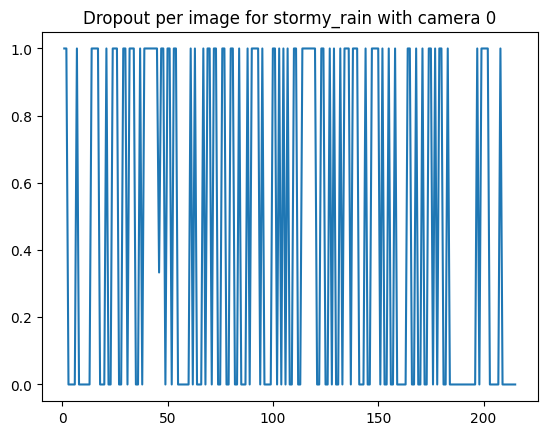

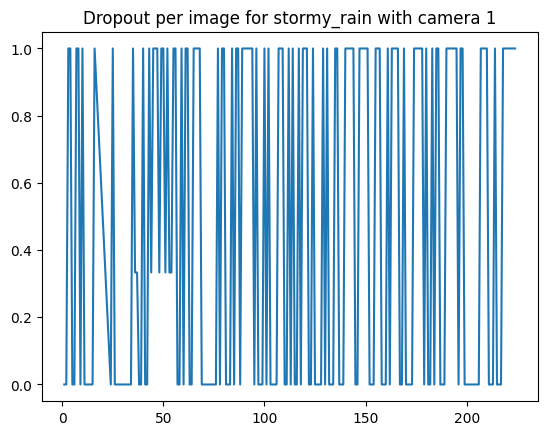

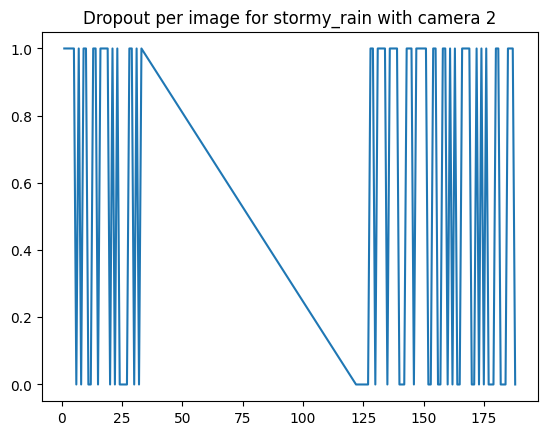

({'CAM00_img209': [],
  'CAM00_img045': [{'class_id': 0,
    'x1': 1940.084595,
    'y1': 1077.493652,
    'x2': 2086.324707,
    'y2': 1155.617554},
   {'class_id': 0,
    'x1': 1451.261353,
    'y1': 896.072266,
    'x2': 2406.444336,
    'y2': 1207.728638},
   {'class_id': 0,
    'x1': 2192.429199,
    'y1': 1107.546753,
    'x2': 2234.724609,
    'y2': 1159.657227}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 434.84494,
    'y1': 1213.360107,
    'x2': 469.227417,
    'y2': 1254.743896}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 1986.777344,
    'y1': 844.14679,
    'x2': 2464,
    'y2': 1150.023804}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 523.110901,
    'y1': 951.291382,
    'x2': 560.096375,
    'y2': 993.680969}],
  'CAM01_img015': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 280.033447,
    'y1': 1147.199951,
    'x2': 318.93335,
    'y2': 1189.496338}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 498.195374,
    'y1': 1087.702271,
    'x2': 668.282349,
    '

In [35]:
condition_name = 'stormy_rain'
condition_folders = stormy_rain
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_induvidual_contions_1024imgz_hurtigruta_and_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)